https://github.com/laishenggx/CMORPH

In [57]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import matplotlib as mpl
from dateutil.relativedelta import *
import datetime as dt
import cartopy.crs as ccrs
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm

In [58]:
%matplotlib inline

In [59]:
def search(s, path=os.path.abspath('.')):  #os.path.abspath(path)：绝对路径
    filenames=[]
    for z in os.listdir(path):
        if os.path.isdir(path + os.path.sep + z):  # os.path.sep:路径分隔符 linux下就用这个了’/’
            #print('Currnet:', path)
            path2 = os.path.join(path, z) #；os.path.join(): 常用来链接路径
            #print('future:', path2)
            search(s, path2)
        elif os.path.isfile(path + os.path.sep + z): #检验给出的路径是否是一个文件：os.path.isfile()来自 <http://blog.csdn.net/devil_2009/article/details/7941241>
            if s in z:
                #print(os.path.join(path, z))
                filenames.append(os.path.join(path, z))
                #with open(path + os.path.sep + z, 'r') as fr:
                #    with open('save.txt', 'a') as fw:
                #        fw.write(path + '\t' + fr.read())
    return filenames

In [68]:
def draw_cmorph(pre,filename):
    lon_leftup=70
    lat_leftup=59
    lon_rightdown=140;lat_rightdown=15
    res=0.1
    lon=np.arange(lon_leftup,lon_rightdown,res)
    lat=np.arange(lat_rightdown,lat_leftup,res)
    fig, ax = plt.subplots()
    lon_leftup=70;lat_leftup=59
    lon_rightdown=140;lat_rightdown=15
    m = Basemap(projection='cyl', llcrnrlat=lat_rightdown, urcrnrlat=lat_leftup, llcrnrlon=lon_leftup, urcrnrlon=lon_rightdown, resolution='l')
    #m.readshapefile('/public/home/hysplit/work/product/script/post/',"bou2_4l.shp", color='black',linewidth=0.3)
    m.readshapefile('D:\\data\\map\\bou2_4l',"whatevername", color='black',linewidth=0.3)
    #m.readshapefile("/public/home/hysplit/work/product/script/post/hyd1_4l","whatevername",color=(0,120/255,1),linewidth=0.2)
    m.drawcoastlines(linewidth=0.3, color='black')
    parallels = np.arange(20,90,10) #纬线
    m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0.2,dashes=[1,4])
    meridians = np.arange(0,200,10) #经线
    m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0.2,dashes=[1,4])

    cdict = [(151 / 255, 250 / 255, 151 / 255), (49/ 255, 204 / 255, 49/ 255), (126/ 255, 191 / 255, 237 / 255)
            , (0 / 255, 0 / 255, 255 / 255), (237/ 255, 0 / 255, 237 / 255)]
    my_cmap = colors.ListedColormap(cdict,'pre3h')
    my_cmap.set_under('w')
    my_cmap.set_over((135/ 255, 25 / 255, 25 / 255))
    lev=np.array([5,10,20,50,100,150,200])
    norm3 = mpl.colors.BoundaryNorm(lev, my_cmap.N)

    lons, lats = np.meshgrid(lon,lat)
    x, y = m(lons, lats)
    pp=m.pcolormesh(x,y,pre,cmap=CM.get_cmap('jet'),norm=PowerNorm(gamma=0.3))
    #cb=fig.colorbar(pp,ax=ax,pad=0.07,shrink=0.7,aspect=25,orientation='horizontal')
    plt.colorbar(label=r'Precipitation frequency')
    # cb=fig.colorbar(pp,ax=ax,pad=0.02,shrink=0.7,aspect=20)
    #font1={'family':'SimHei','size':8,'color':'b'}
    #font2={'family':'SimHei','size':8,'color':'k'}
    #font3={'family':'SimHei','size':8,'color':'r'}
    #ax.text(0.005, 1.02, '全国自动站&CMORPH降水融合产品:逐小时降水量(单位:mm)',fontdict=font2,transform=ax.transAxes)
    #ax.text(0.67, 1.06,'%04d年%02d月%02d日 %02d:00(北京时)'%(bjt.year,bjt.month,bjt.day,bjt.hour), transform=ax.transAxes, fontdict=font3)
    ###ax.text(0.60, 1.015,'%04d%02d%02d %02d:00(UTC)'%(utc_time.year,utc_time.month,utc_time.day,utc_time.hour), \
    ###        transform=ax.transAxes)


  #南海小图
    '''
    a = plt.axes([0.649, 0.292, 0.25, 0.23])
    lon_leftup=107;lat_leftup=24
    lon_rightdown=121.3;lat_rightdown=2.4
    m = Basemap(projection='cyl', llcrnrlat=lat_rightdown, urcrnrlat=lat_leftup, llcrnrlon=lon_leftup, urcrnrlon=lon_rightdown, resolution='l')
    m.drawcoastlines(linewidth=0.3, color='gray')
    m.contourf(x,y,pre,cmap=my_cmap,levels=lev,norm=norm3,extend='both')


    m.readshapefile('/public/home/hysplit/work/product/script/post/bou2_4l',"whatevername", color='black',linewidth=0.3)
    #font1={'family':'SimHei','size':6,'color':'black'}
    a.text(0.81,0.40,'South Sea',transform=ax.transAxes)#bbox=dict(boxstyle='square',ec='k',fc='w',pad=0.3))
    ###plt.savefig('%04d%02d%02d-%02d00.png'%(bjt.year,bjt.month,bjt.day,bjt.hour),dpi=300,bbox_inches='tight')
    '''
    plt.savefig(filename+'.png',dpi=400)
    #plt.show()
    return fig,ax

In [69]:
filenames=search('count1.csv', './')
filenames=sorted(filenames)#;防止顺序不对

./01utc_count1.csv
./04utc_count1.csv


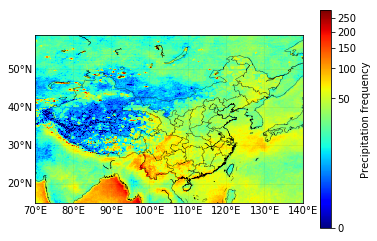

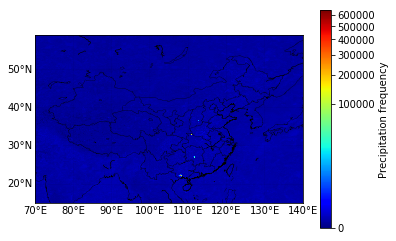

In [71]:
 for filename in filenames:
        print(filename)
        df=pd.read_csv(filename,header=None)
        draw_cmorph(df,filename[:-4])